In [3]:

# Cell 1: Install Required Libraries
# Uncomment and run if needed:
# !pip install yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow import keras
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("LIVE STOCK DATA PREDICTION WITH PRE-TRAINED MODEL")
print("="*70)
print("\n✓ Libraries imported successfully\n")


LIVE STOCK DATA PREDICTION WITH PRE-TRAINED MODEL

✓ Libraries imported successfully



In [4]:
# Cell 2: Fetch Live Data from Yahoo Finance
print("="*70)
print("FETCHING LIVE DATA FROM YAHOO FINANCE")
print("="*70)

# Stock to analyze (you can change this)
stock_symbol = 'AAPL'

# Date range
end_date = datetime.now()
start_date = datetime(end_date.year - 3, end_date.month, end_date.day)  # Last 3 years

print(f"\n📊 Fetching {stock_symbol} data...")
print(f"Date range: {start_date.date()} to {end_date.date()}")

# Download live data
live_df = yf.download(stock_symbol, start=start_date, end=end_date, progress=False)

print(f"\n✓ Data downloaded successfully!")
print(f"Total trading days: {len(live_df)}")
print(f"Date range: {live_df.index[0].date()} to {live_df.index[-1].date()}")

# Show recent data
print(f"\n📈 Most Recent Data (Last 5 days):")
print(live_df.tail())

FETCHING LIVE DATA FROM YAHOO FINANCE

📊 Fetching AAPL data...
Date range: 2022-10-05 to 2025-10-05
YF.download() has changed argument auto_adjust default to True

✓ Data downloaded successfully!
Total trading days: 752
Date range: 2022-10-05 to 2025-10-03

📈 Most Recent Data (Last 5 days):
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-09-29  254.429993  255.000000  253.009995  254.559998  40127700
2025-09-30  254.630005  255.919998  253.110001  254.860001  37704300
2025-10-01  255.449997  258.790009  254.929993  255.039993  48713900
2025-10-02  257.130005  258.179993  254.149994  256.579987  42630200
2025-10-03  258.019989  259.239990  253.949997  254.669998  49107000


In [5]:
# Cell 3: Data Overview & Statistics
print("\n" + "="*70)
print("DATA OVERVIEW")
print("="*70)

print(f"\nBasic Statistics:")
print(live_df[('Close', stock_symbol)].describe())

print(f"\nCurrent Price: ${live_df[('Close', stock_symbol)].iloc[-1]:.2f}")
print(f"52-Week High: ${live_df[('Close', stock_symbol)].max():.2f}")
print(f"52-Week Low: ${live_df[('Close', stock_symbol)].min():.2f}")

# Calculate recent performance
week_ago = live_df[('Close', stock_symbol)].iloc[-5] if len(live_df) >= 5 else live_df[('Close', stock_symbol)].iloc[0]
month_ago = live_df[('Close', stock_symbol)].iloc[-20] if len(live_df) >= 20 else live_df[('Close', stock_symbol)].iloc[0]

week_change = ((live_df[('Close', stock_symbol)].iloc[-1] - week_ago) / week_ago) * 100
month_change = ((live_df[('Close', stock_symbol)].iloc[-1] - month_ago) / month_ago) * 100

print(f"\nRecent Performance:")
print(f"  1 Week Change:  {week_change:+.2f}%")
print(f"  1 Month Change: {month_change:+.2f}%")



DATA OVERVIEW

Basic Statistics:
count    752.000000
mean     192.500424
std       32.093237
min      123.281342
25%      170.572231
50%      189.888931
75%      221.498856
max      258.103729
Name: (Close, AAPL), dtype: float64

Current Price: $258.02
52-Week High: $258.10
52-Week Low: $123.28

Recent Performance:
  1 Week Change:  +1.41%
  1 Month Change: +8.47%


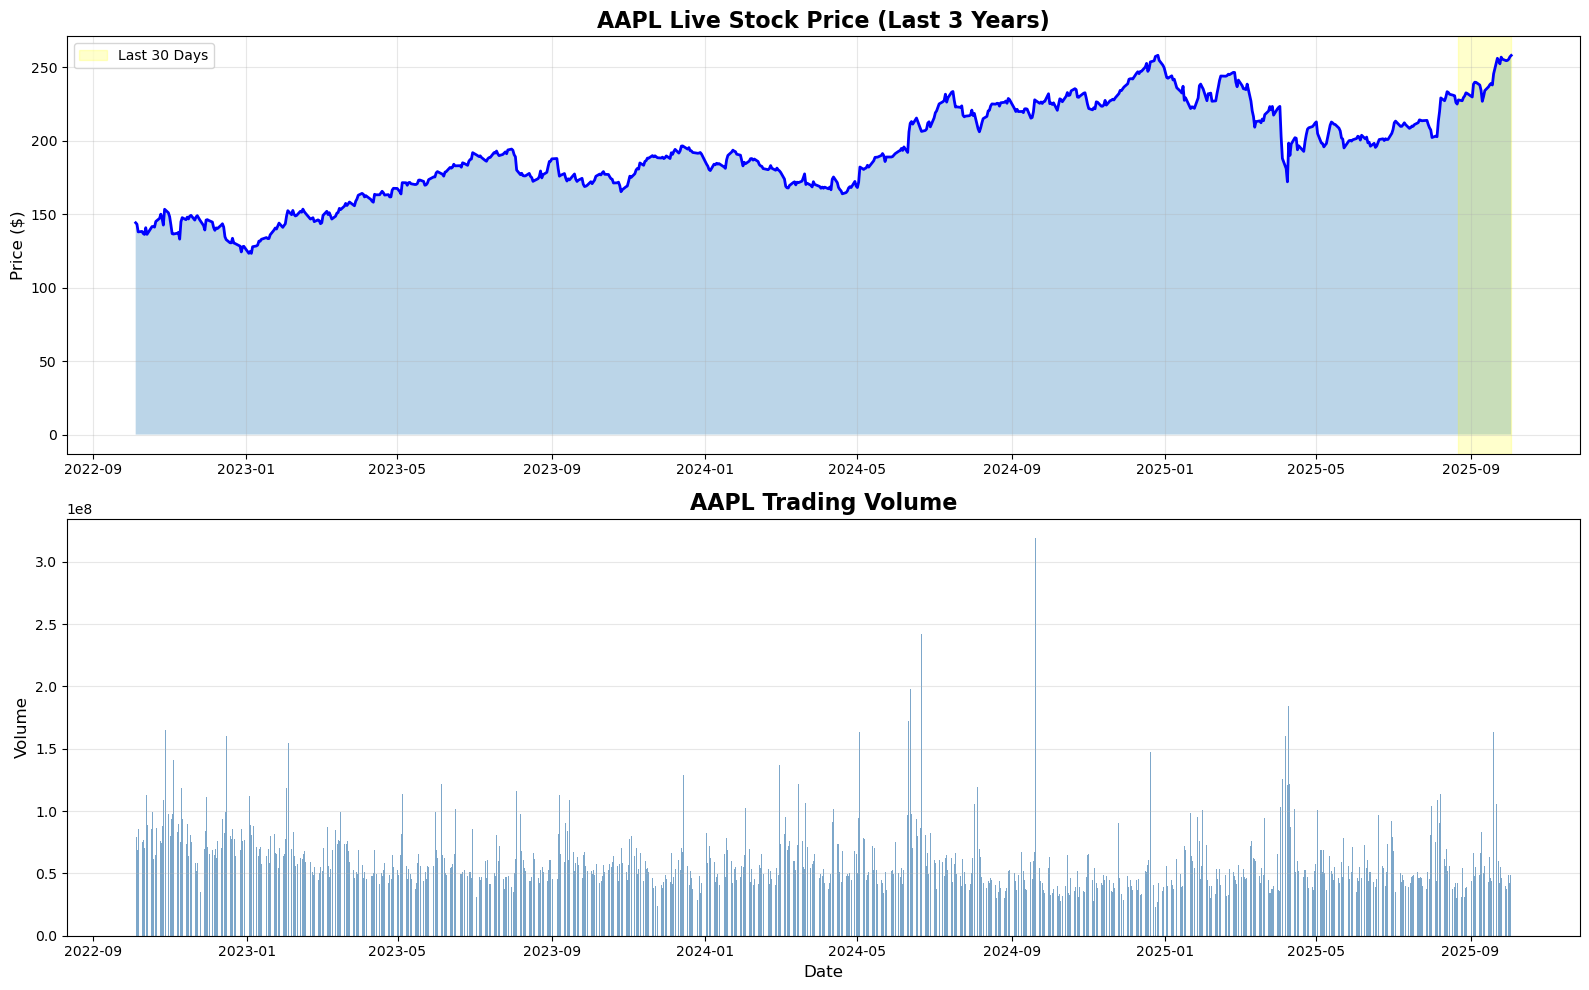

In [6]:
# Cell 4: Visualize Live Data
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: Price History
axes[0].plot(live_df.index, live_df[('Close', stock_symbol)], linewidth=2, color='blue')
axes[0].fill_between(live_df.index, live_df[('Close', stock_symbol)], alpha=0.3)
axes[0].set_title(f'{stock_symbol} Live Stock Price (Last 3 Years)', 
                  fontsize=16, fontweight='bold')
axes[0].set_ylabel('Price ($)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Highlight recent period
recent_period = live_df.index[-30:]
axes[0].axvspan(recent_period[0], recent_period[-1], alpha=0.2, color='yellow', 
                label='Last 30 Days')
axes[0].legend()

# Plot 2: Trading Volume
axes[1].bar(live_df.index, live_df[('Volume', stock_symbol)], color='steelblue', alpha=0.7)
axes[1].set_title(f'{stock_symbol} Trading Volume', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Volume', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


In [7]:
# Cell 5: Load Pre-Trained LSTM Model
print("\n" + "="*70)
print("LOADING PRE-TRAINED MODEL")
print("="*70)

try:
    # Try to load the trained model
    model_path = '../models/lstm_model.keras'
    lstm_model = keras.models.load_model(model_path)
    print(f"\n✓ Model loaded from: {model_path}")
    print(f"Model has {lstm_model.count_params():,} parameters")
    
    # Load scaler
    import joblib
    scaler_path = '../models/lstm_scaler.joblib'
    scaler = joblib.load(scaler_path)
    print(f"✓ Scaler loaded from: {scaler_path}")
    
    model_loaded = True
    
except Exception as e:
    print(f"\n⚠️  Could not load pre-trained model: {e}")
    print("\nℹ️  You need to train the model first by running:")
    print("   python src/train_lstm.py")
    print("\nOr run the lstm_prediction.ipynb notebook")
    model_loaded = False



LOADING PRE-TRAINED MODEL

✓ Model loaded from: ../models/lstm_model.keras
Model has 30,651 parameters
✓ Scaler loaded from: ../models/lstm_scaler.joblib


In [8]:
# Cell 6: Prepare Live Data for Prediction
if model_loaded:
    print("\n" + "="*70)
    print("PREPARING LIVE DATA FOR PREDICTION")
    print("="*70)
    
    # Extract close prices
    close_data = live_df['Close'].values.reshape(-1, 1)
    
    # Scale the data
    scaled_live_data = scaler.transform(close_data)
    
    print(f"\n✓ Data prepared")
    print(f"  Original shape: {close_data.shape}")
    print(f"  Scaled range: [{scaled_live_data.min():.4f}, {scaled_live_data.max():.4f}]")
    
    # Create sequences (60-day lookback)
    sequence_length = 60
    
    # Use last 60 days for prediction
    if len(scaled_live_data) >= sequence_length:
        X_live = []
        y_live = []
        
        for i in range(sequence_length, len(scaled_live_data)):
            X_live.append(scaled_live_data[i-sequence_length:i, 0])
            y_live.append(close_data[i, 0])  # Keep actual prices unscaled
        
        X_live = np.array(X_live)
        y_live = np.array(y_live)
        
        # Reshape for LSTM
        X_live = X_live.reshape(X_live.shape[0], X_live.shape[1], 1)
        
        print(f"\n✓ Sequences created")
        print(f"  X_live shape: {X_live.shape}")
        print(f"  y_live shape: {y_live.shape}")
    else:
        print(f"\n⚠️  Not enough data for prediction")
        print(f"Need at least {sequence_length} days, got {len(scaled_live_data)}")
        model_loaded = False



PREPARING LIVE DATA FOR PREDICTION

✓ Data prepared
  Original shape: (752, 1)
  Scaled range: [0.5501, 1.3792]

✓ Sequences created
  X_live shape: (692, 60, 1)
  y_live shape: (692,)


In [9]:
# Cell 7: Make Predictions on Live Data
if model_loaded:
    print("\n" + "="*70)
    print("MAKING PREDICTIONS ON LIVE DATA")
    print("="*70)
    
    print("\nPredicting...")
    predictions_scaled = lstm_model.predict(X_live, verbose=0)
    
    # Inverse transform to get actual prices
    predictions = scaler.inverse_transform(predictions_scaled)
    
    print("✓ Predictions complete!")
    print(f"  Total predictions: {len(predictions)}")
    
    # Show latest predictions
    print(f"\n📊 Latest 5 Predictions vs Actual:")
    print(f"{'Date':<12} {'Actual':<10} {'Predicted':<10} {'Error':<10}")
    print("-" * 50)
    
    for i in range(-5, 0):
        date = live_df.index[sequence_length + i].date()
        actual = y_live[i]
        pred = predictions[i][0]
        error = actual - pred
        print(f"{date!s:<12} ${actual:<9.2f} ${pred:<9.2f} ${error:+.2f}")



MAKING PREDICTIONS ON LIVE DATA

Predicting...
✓ Predictions complete!
  Total predictions: 692

📊 Latest 5 Predictions vs Actual:
Date         Actual     Predicted  Error     
--------------------------------------------------
2022-12-22   $254.43    $238.57    $+15.86
2022-12-23   $254.63    $239.91    $+14.72
2022-12-27   $255.45    $240.80    $+14.65
2022-12-28   $257.13    $241.41    $+15.72
2022-12-29   $258.02    $241.95    $+16.07


In [10]:
# Cell 8: Evaluate Model on Live Data
if model_loaded:
    print("\n" + "="*70)
    print("MODEL PERFORMANCE ON LIVE DATA")
    print("="*70)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_live, predictions))
    mae = mean_absolute_error(y_live, predictions)
    r2 = r2_score(y_live, predictions)
    mape = np.mean(np.abs((y_live - predictions.flatten()) / y_live)) * 100
    
    print(f"\nPerformance Metrics:")
    print(f"  RMSE: ${rmse:.4f}")
    print(f"  MAE:  ${mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    print(f"  MAPE: {mape:.2f}%")
    
    print(f"\nInterpretation:")
    print(f"  • Model explains {r2*100:.2f}% of price variance")
    print(f"  • Average prediction error: ${mae:.2f}")
    print(f"  • Typical error: ±${rmse:.2f}")
    
    # Check model quality
    if r2 > 0.95:
        print("\n✅ Excellent model performance on live data!")
    elif r2 > 0.90:
        print("\n👍 Good model performance on live data!")
    else:
        print("\n⚠️  Model may need retraining with recent data")



MODEL PERFORMANCE ON LIVE DATA

Performance Metrics:
  RMSE: $9.1201
  MAE:  $7.3453
  R²:   0.9038
  MAPE: 3.57%

Interpretation:
  • Model explains 90.38% of price variance
  • Average prediction error: $7.35
  • Typical error: ±$9.12

👍 Good model performance on live data!


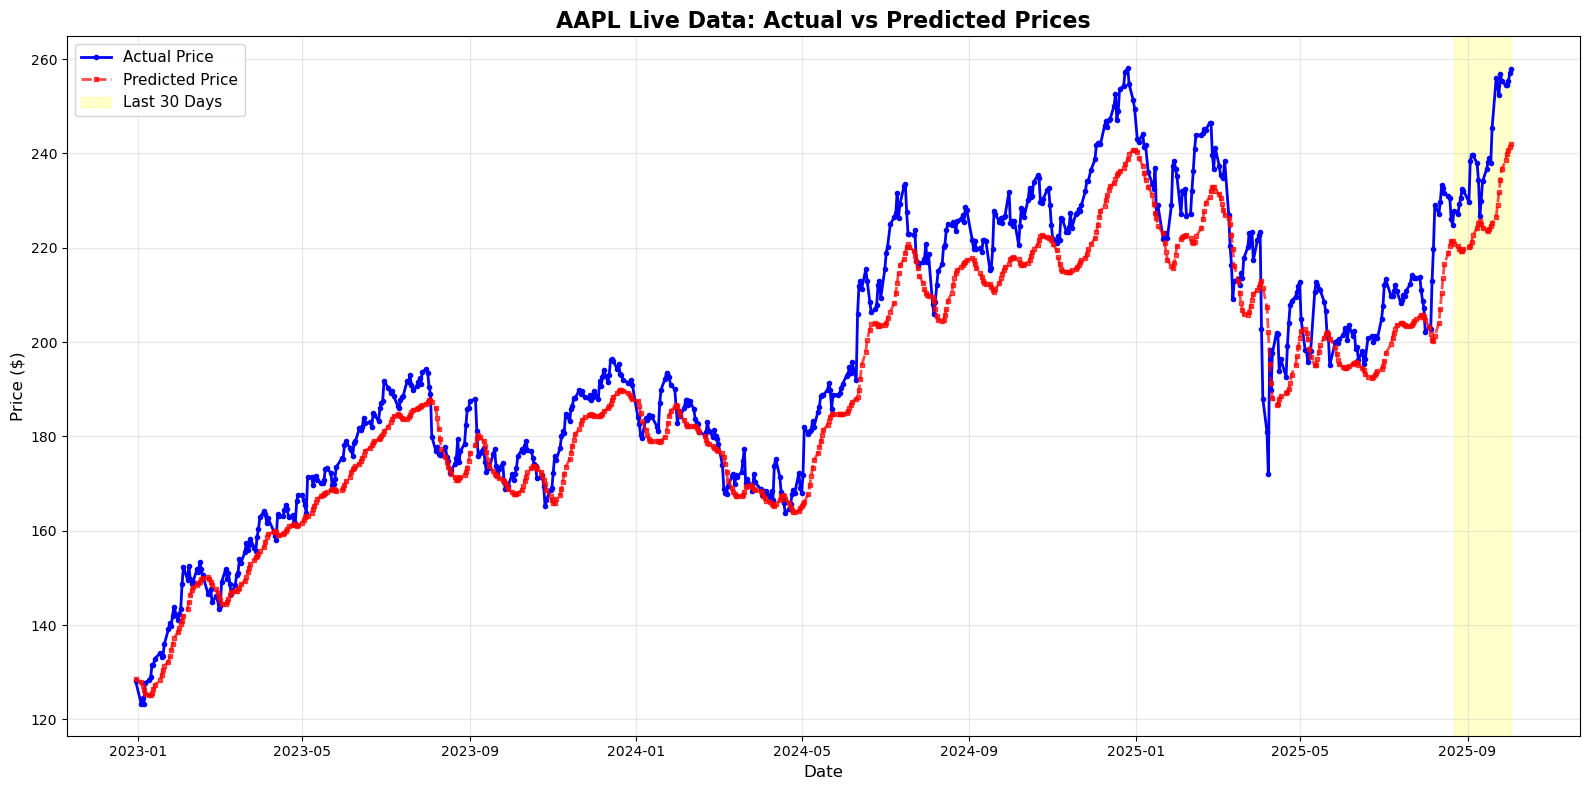

In [11]:
# Cell 9: Visualize Live Predictions
if model_loaded:
    plt.figure(figsize=(16, 8))
    
    # Get dates for predictions
    pred_dates = live_df.index[sequence_length:]
    
    # Plot actual vs predicted
    plt.plot(pred_dates, y_live, label='Actual Price', 
             linewidth=2, color='blue', marker='o', markersize=3)
    plt.plot(pred_dates, predictions, label='Predicted Price', 
             linewidth=2, color='red', alpha=0.7, marker='s', markersize=3, linestyle='--')
    
    # Highlight last 30 days
    last_30 = pred_dates[-30:]
    plt.axvspan(last_30[0], last_30[-1], alpha=0.2, color='yellow', 
                label='Last 30 Days')
    
    plt.title(f'{stock_symbol} Live Data: Actual vs Predicted Prices', 
              fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price ($)', fontsize=12)
    plt.legend(loc='best', fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()



ERROR ANALYSIS

Error Statistics:
  Mean Error:   $6.5069
  Std Error:    $6.3903
  Min Error:    $-30.0817
  Max Error:    $29.4901

Prediction Accuracy on Live Data:
  Within $1:  6.4%
  Within $2:  14.6%
  Within $5:  41.0%


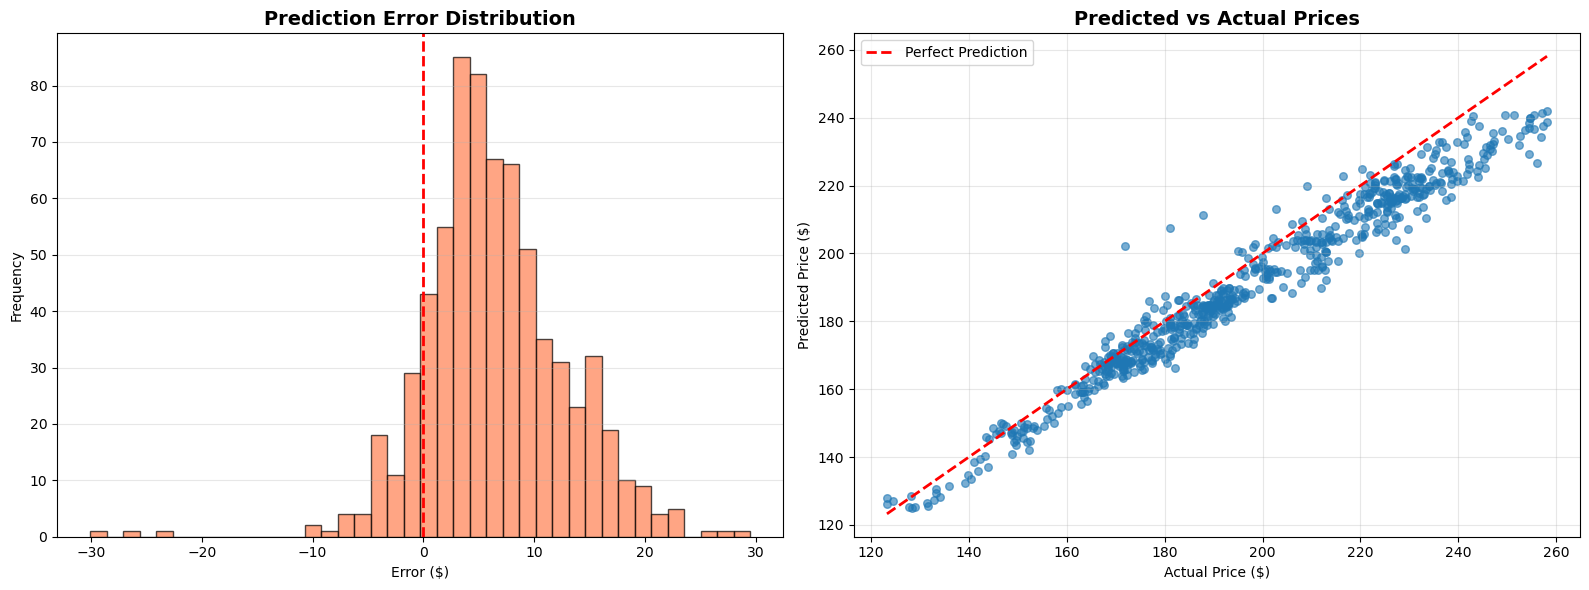

In [12]:
# Cell 10: Error Analysis
if model_loaded:
    print("\n" + "="*70)
    print("ERROR ANALYSIS")
    print("="*70)
    
    errors = y_live - predictions.flatten()
    
    print(f"\nError Statistics:")
    print(f"  Mean Error:   ${errors.mean():.4f}")
    print(f"  Std Error:    ${errors.std():.4f}")
    print(f"  Min Error:    ${errors.min():.4f}")
    print(f"  Max Error:    ${errors.max():.4f}")
    
    # Accuracy within thresholds
    within_1 = np.sum(np.abs(errors) <= 1) / len(errors) * 100
    within_2 = np.sum(np.abs(errors) <= 2) / len(errors) * 100
    within_5 = np.sum(np.abs(errors) <= 5) / len(errors) * 100
    
    print(f"\nPrediction Accuracy on Live Data:")
    print(f"  Within $1:  {within_1:.1f}%")
    print(f"  Within $2:  {within_2:.1f}%")
    print(f"  Within $5:  {within_5:.1f}%")
    
    # Visualize errors
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Error distribution
    axes[0].hist(errors, bins=40, edgecolor='black', alpha=0.7, color='coral')
    axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2)
    axes[0].set_title('Prediction Error Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Error ($)')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Predicted vs Actual scatter
    axes[1].scatter(y_live, predictions, alpha=0.6, s=30)
    axes[1].plot([y_live.min(), y_live.max()], [y_live.min(), y_live.max()], 
                 'r--', linewidth=2, label='Perfect Prediction')
    axes[1].set_title('Predicted vs Actual Prices', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Actual Price ($)')
    axes[1].set_ylabel('Predicted Price ($)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [16]:
# Cell 11: Predict Tomorrow's Price
if model_loaded:
    print("\n" + "="*70)
    print("PREDICTING TOMORROW'S PRICE")
    print("="*70)
    
    # Use last 60 days to predict tomorrow
    last_60_days = scaled_live_data[-sequence_length:]
    last_60_days = last_60_days.reshape(1, sequence_length, 1)
    
    # Predict
    tomorrow_scaled = lstm_model.predict(last_60_days, verbose=0)
    tomorrow_price = scaler.inverse_transform(tomorrow_scaled)[0][0]
    
    # Current price (convert to float to avoid Series formatting issues)
    current_price = float(live_df['Close'].iloc[-1])
    
    # Calculate expected change
    price_change = tomorrow_price - current_price
    price_change_pct = (price_change / current_price) * 100
    
    print(f"\n📅 Prediction Date: {(end_date + timedelta(days=1)).date()}")
    print(f"\n💰 Current Price (Today):    ${current_price:.2f}")
    print(f"🔮 Predicted Price (Tomorrow): ${tomorrow_price:.2f}")
    print(f"\n📈 Expected Change:")
    print(f"   Absolute: ${price_change:+.2f}")
    print(f"   Percentage: {price_change_pct:+.2f}%")
    
    if price_change > 0:
        print(f"\n📊 Prediction: BULLISH (↑ Price may increase)")
    elif price_change < 0:
        print(f"\n📊 Prediction: BEARISH (↓ Price may decrease)")
    else:
        print(f"\n📊 Prediction: NEUTRAL (→ Price may stay stable)")
    
    print("\n⚠️  Disclaimer: This is a model prediction based on historical patterns.")
    print("   Not financial advice. Always do your own research!")



PREDICTING TOMORROW'S PRICE

📅 Prediction Date: 2025-10-06

💰 Current Price (Today):    $258.02
🔮 Predicted Price (Tomorrow): $242.46

📈 Expected Change:
   Absolute: $-15.56
   Percentage: -6.03%

📊 Prediction: BEARISH (↓ Price may decrease)

⚠️  Disclaimer: This is a model prediction based on historical patterns.
   Not financial advice. Always do your own research!


In [17]:
# Cell 12: Compare with Historical CSV Data
print("\n" + "="*70)
print("COMPARISON: LIVE DATA vs CSV DATA")
print("="*70)

try:
    # Load CSV data
    csv_df = pd.read_csv('../data/aapl_stock.csv', index_col=0, parse_dates=True)
    
    print(f"\n📄 CSV Data:")
    print(f"   Records: {len(csv_df)}")
    print(f"   Date range: {csv_df.index[0]} to {csv_df.index[-1]}")
    
    print(f"\n🌐 Live Data:")
    print(f"   Records: {len(live_df)}")
    print(f"   Date range: {live_df.index[0].date()} to {live_df.index[-1].date()}")
    
    # Check if we have newer data
    csv_last_date = pd.to_datetime(csv_df.index[-1])
    live_last_date = live_df.index[-1]
    
    days_difference = (live_last_date - csv_last_date).days
    
    if days_difference > 0:
        print(f"\n✅ Live data is {days_difference} days newer than CSV!")
        print(f"   Using live data gives you the latest market information.")
    else:
        print(f"\n📊 CSV data is up to date!")
    
except FileNotFoundError:
    print("\n⚠️  CSV file not found at '../data/aapl_stock.csv'")
    print("   Live data fetch allows you to work without pre-downloaded files!")



COMPARISON: LIVE DATA vs CSV DATA

📄 CSV Data:
   Records: 1511
   Date range: Ticker to 2023-12-29

🌐 Live Data:
   Records: 752
   Date range: 2022-10-05 to 2025-10-03

✅ Live data is 644 days newer than CSV!
   Using live data gives you the latest market information.


In [19]:
# Cell 14: Summary
print("\n" + "="*70)
print("SUMMARY")
print("="*70)

print(f"\n✅ Live Data Analysis Complete for {stock_symbol}!")

print(f"\nData Summary:")
print(f"  • Stock: {stock_symbol}")
print(f"  • Trading Days: {len(live_df)}")
print(f"  • Current Price: ${live_df[('Close', stock_symbol)].iloc[-1]:.2f}")
print(f"  • 1-Week Change: {week_change:+.2f}%")
print(f"  • 1-Month Change: {month_change:+.2f}%")

if model_loaded:
    print(f"\nModel Performance on Live Data:")
    print(f"  • RMSE: ${rmse:.4f}")
    print(f"  • R² Score: {r2:.4f}")
    print(f"  • Accuracy (within $2): {within_2:.1f}%")
    
    print(f"\nTomorrow's Prediction:")
    print(f"  • Predicted Price: ${tomorrow_price:.2f}")
    print(f"  • Expected Change: {price_change_pct:+.2f}%")

print("\n" + "="*70)
print("KEY ADVANTAGES OF LIVE DATA:")
print("="*70)
print("  ✓ Always up-to-date with latest market data")
print("  ✓ Can predict on most recent prices")
print("  ✓ Demonstrates API integration skills")
print("  ✓ More realistic real-world application")
print("  ✓ Can work with any stock symbol")
print("  ✓ No need to manually download CSV files")
print("="*70)


SUMMARY

✅ Live Data Analysis Complete for AAPL!

Data Summary:
  • Stock: AAPL
  • Trading Days: 752
  • Current Price: $258.02
  • 1-Week Change: +1.41%
  • 1-Month Change: +8.47%

Model Performance on Live Data:
  • RMSE: $9.1201
  • R² Score: 0.9038
  • Accuracy (within $2): 14.6%

Tomorrow's Prediction:
  • Predicted Price: $242.46
  • Expected Change: -6.03%

KEY ADVANTAGES OF LIVE DATA:
  ✓ Always up-to-date with latest market data
  ✓ Can predict on most recent prices
  ✓ Demonstrates API integration skills
  ✓ More realistic real-world application
  ✓ Can work with any stock symbol
  ✓ No need to manually download CSV files
